In [1]:
import pandas as pd
import torch
import numpy as np
import random
from random import shuffle
from matplotlib import pyplot as plt
import seaborn as sns
from torch.utils.data import TensorDataset, DataLoader
import wget
import os
import aiohttp
import asyncio
np.random.seed(17)
random.seed(17)
torch.manual_seed(17)
from fpl import FPL
from player import Player
from team import Team
from data_processor import get_fpl, get_players, get_teams, get_training_datasets
from models import PreviousScoreModel, PlayerAvgScoreModel, LinearModel, HierarchialLinearModel, NonLinearModel

In [2]:
fpl = await get_fpl()
opponent_feature_names = ["npxG","npxGA"]
player_feature_names = ["total_points", "ict_index", "clean_sheets", "saves", "assists"]
teams = get_teams(team_feature_names=opponent_feature_names, visualize=False)
players = await get_players(player_feature_names, opponent_feature_names, visualize=False, num_players=580)
train_loader, test_loader, _ = get_training_datasets(players, teams)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7f862f1c2790>,
 <torch.utils.data.dataloader.DataLoader at 0x7f8700f48850>)

In [3]:
previous_score_model = PreviousScoreModel(player_feature_names, opponent_feature_names)
player_avg_score_model = PlayerAvgScoreModel(player_feature_names, opponent_feature_names)


player_linear_score_model = LinearModel(player_feature_names, opponent_feature_names)
player_opponent_linear_score_model = LinearModel(player_feature_names, opponent_feature_names, use_opponent_features=True)
heirarchial_linear_model = HierarchialLinearModel(player_feature_names, opponent_feature_names)
non_linear_model = NonLinearModel(player_feature_names, opponent_feature_names)


player_linear_score_model.fit(train_loader)
player_opponent_linear_score_model.fit(train_loader)
heirarchial_linear_model.fit(train_loader)
non_linear_model.fit(train_loader)

None
None
None
None


In [4]:
print(previous_score_model.eval(test_loader))
print(player_avg_score_model.eval(test_loader))
print(player_linear_score_model.eval(test_loader))
print(player_opponent_linear_score_model.eval(test_loader))
print(heirarchial_linear_model.eval(test_loader))
print(non_linear_model.eval(test_loader))

0.9021364045752286
SpearmanrResult(correlation=0.5668993348736984, pvalue=9.903581523390725e-288)
0.7645460817029253
SpearmanrResult(correlation=0.5911458391794018, pvalue=7.4436e-319)
0.5792039432085299
SpearmanrResult(correlation=0.615337302928641, pvalue=0.0)
0.5796013767448586
SpearmanrResult(correlation=0.6047245998650455, pvalue=0.0)
0.580157361445977
SpearmanrResult(correlation=0.6060552165500893, pvalue=0.0)
0.582502159395159
SpearmanrResult(correlation=0.5939602476127752, pvalue=1.2e-322)


torch.Size([3392, 5, 4])


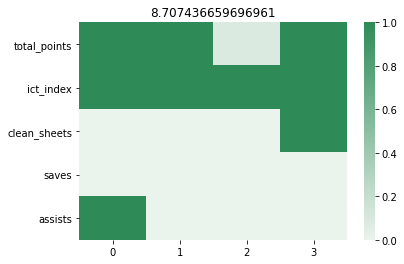

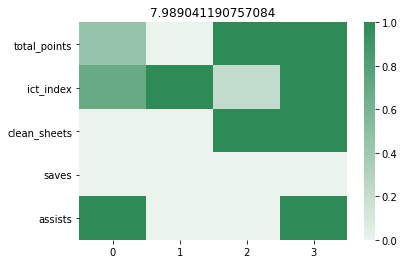

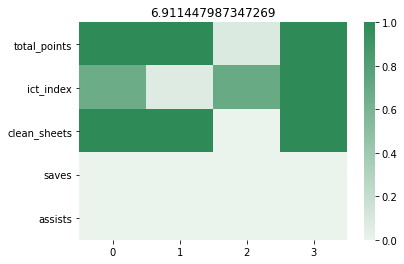

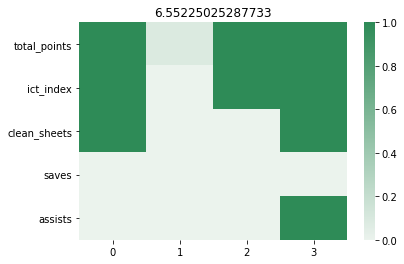

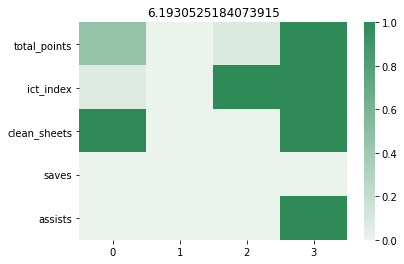

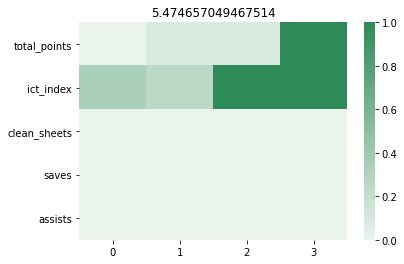

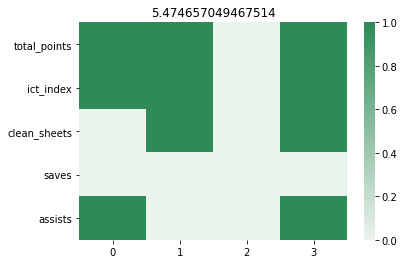

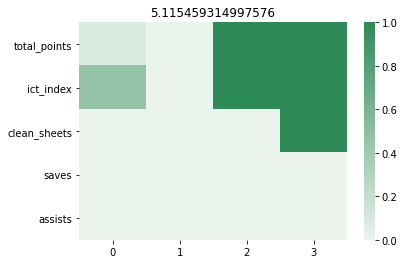

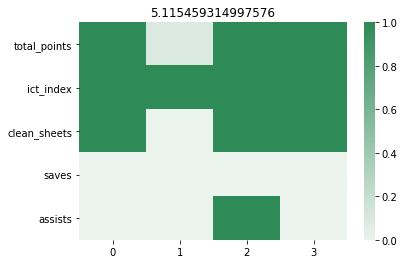

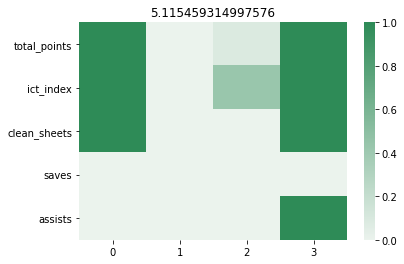

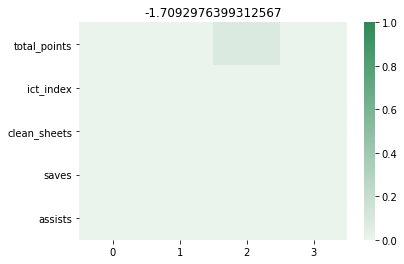

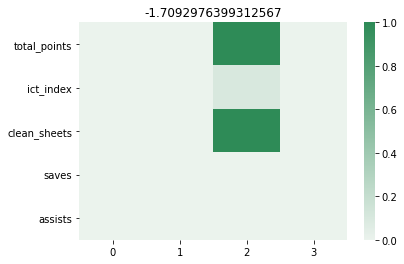

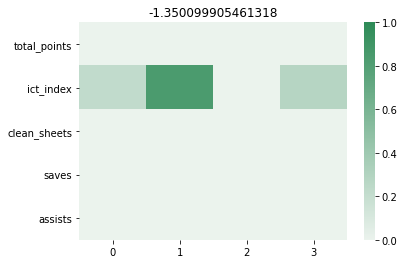

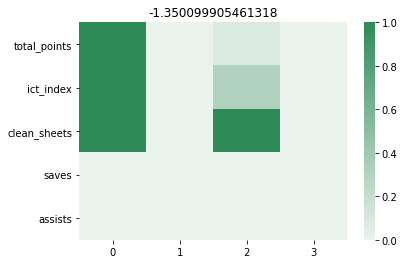

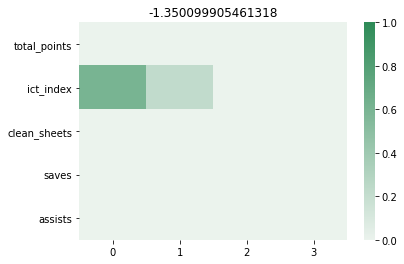

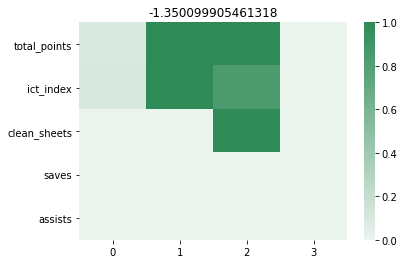

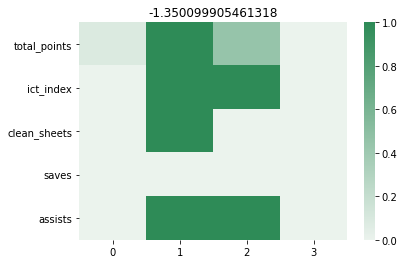

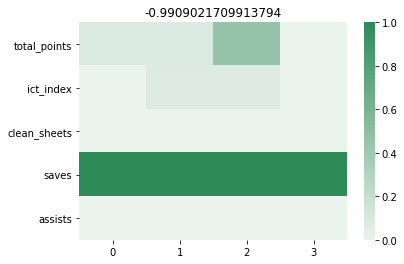

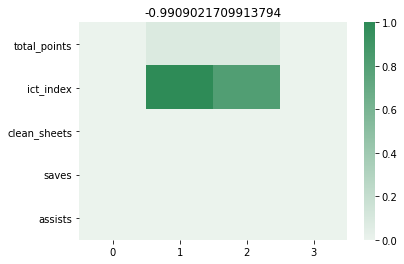

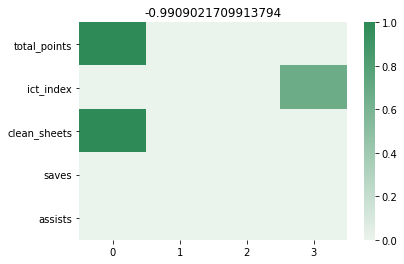

In [5]:
previous_score_model.visualize_predictions(test_loader)

torch.Size([3392, 5, 4])


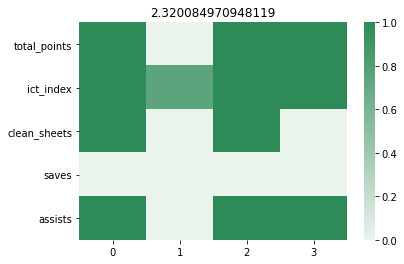

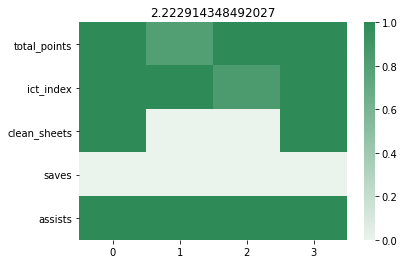

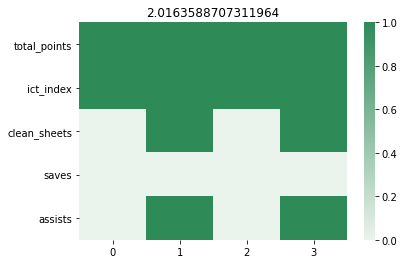

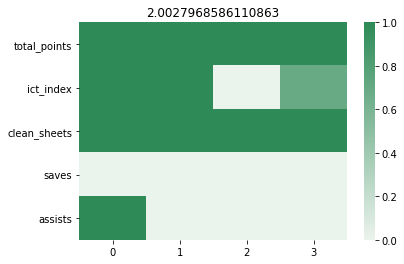

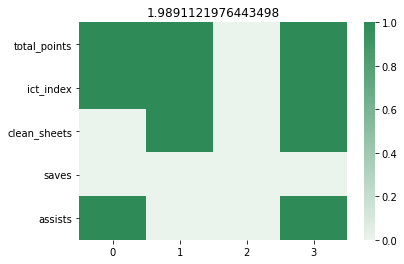

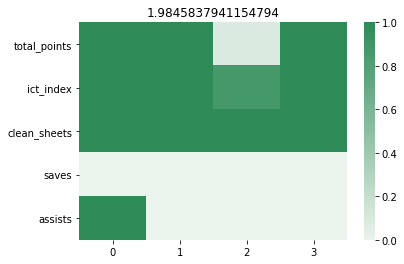

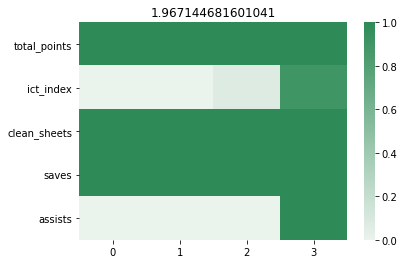

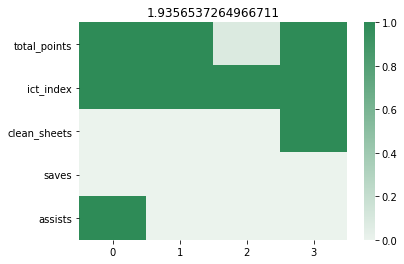

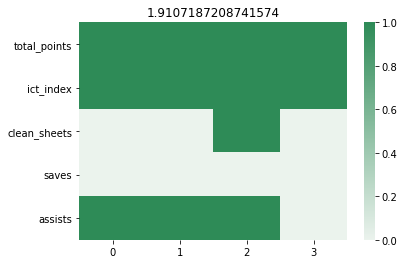

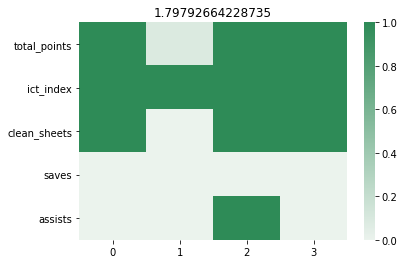

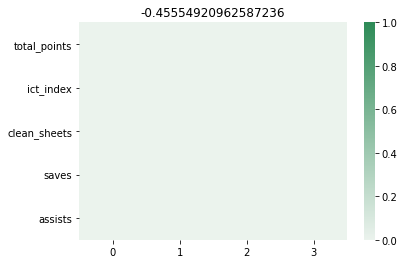

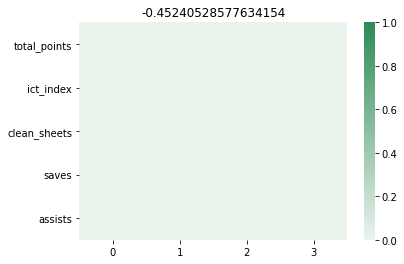

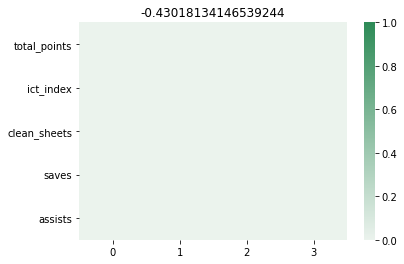

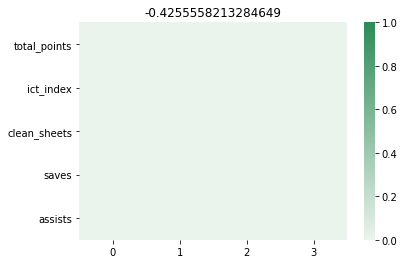

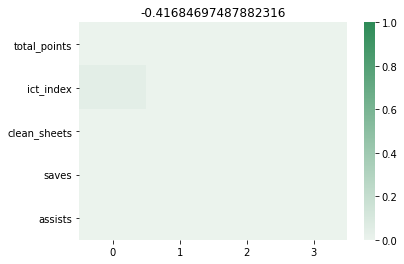

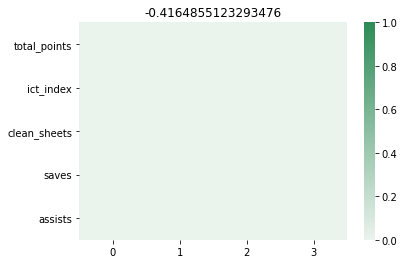

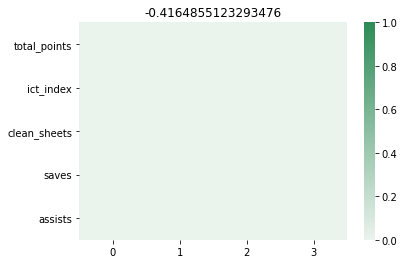

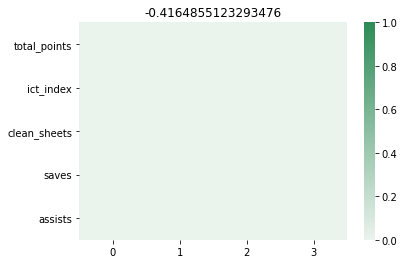

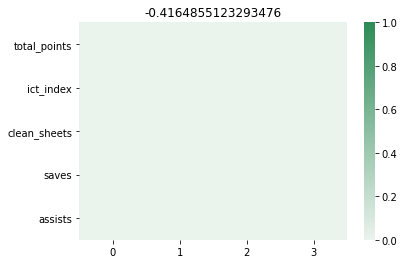

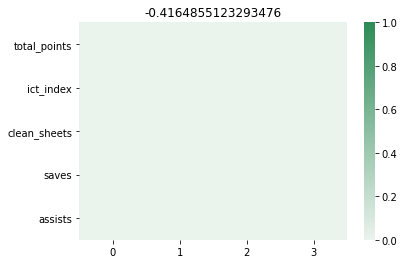

In [6]:
player_avg_score_model.visualize_predictions(test_loader)

torch.Size([3392, 5, 4])


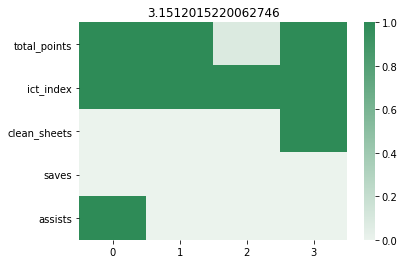

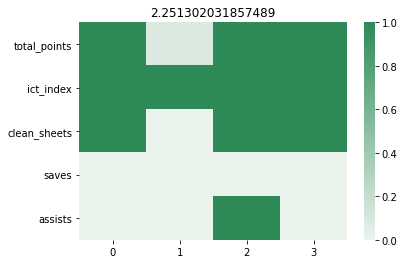

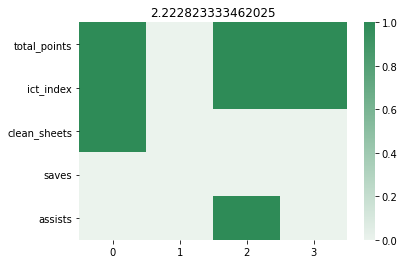

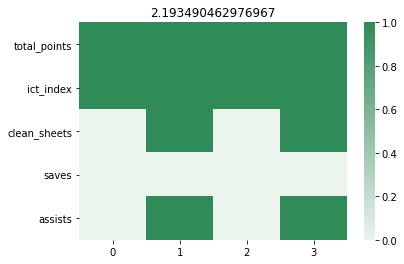

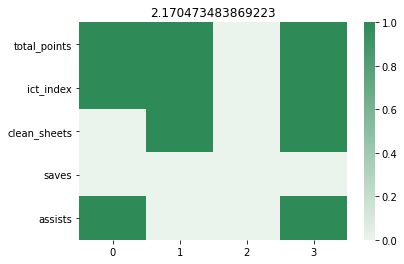

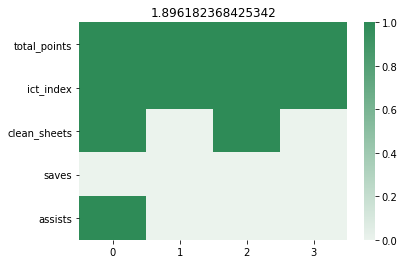

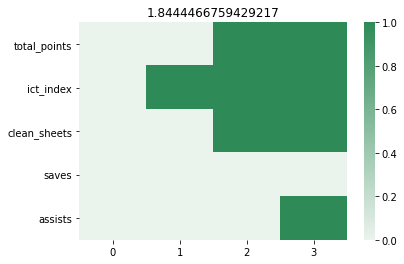

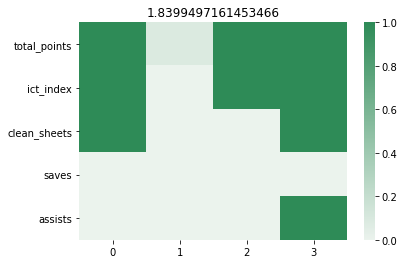

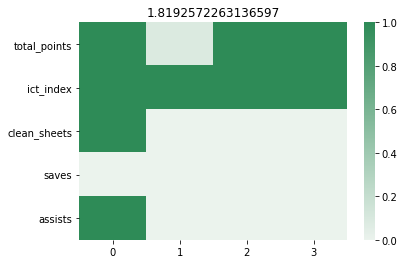

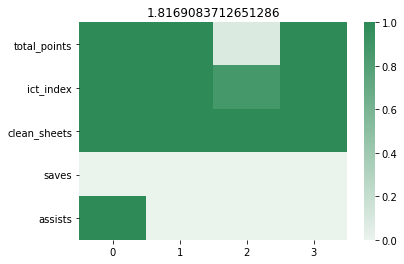

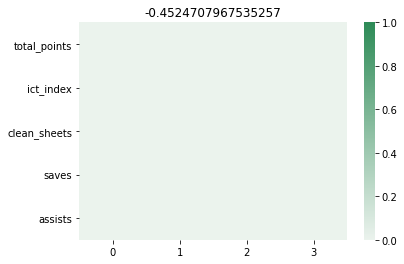

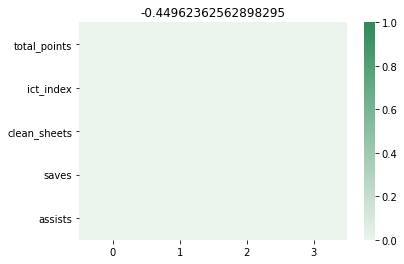

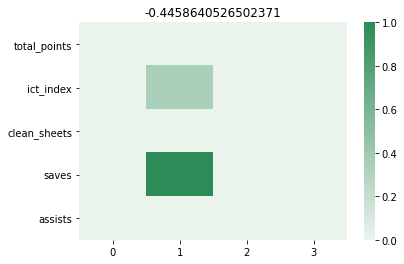

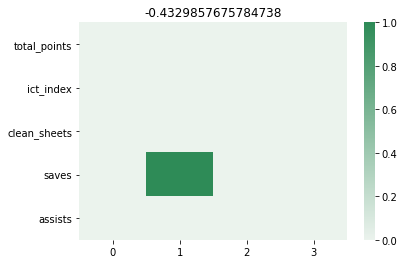

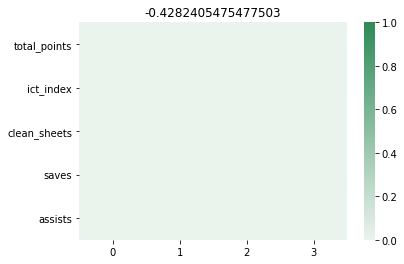

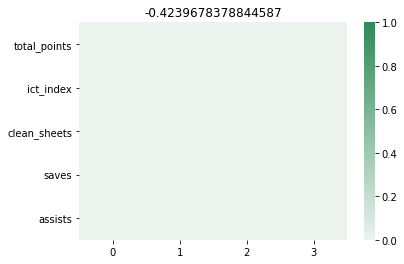

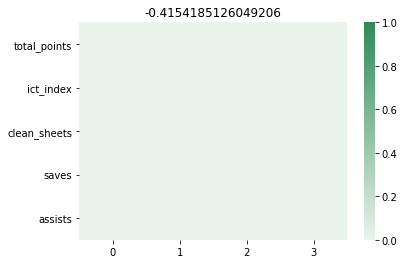

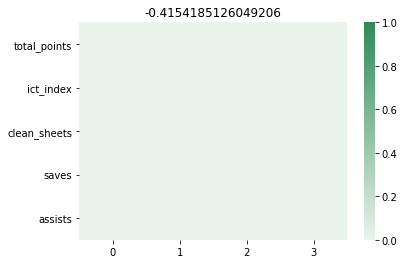

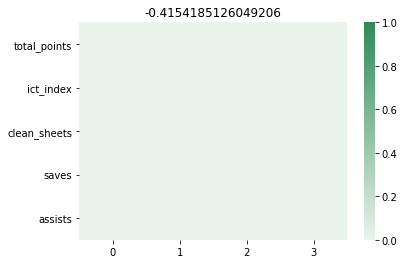

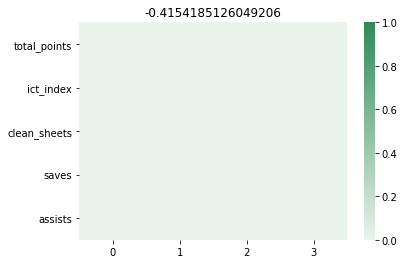

In [7]:
player_linear_score_model.visualize_predictions(test_loader)

torch.Size([3392, 20])


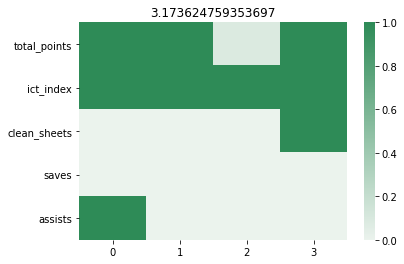

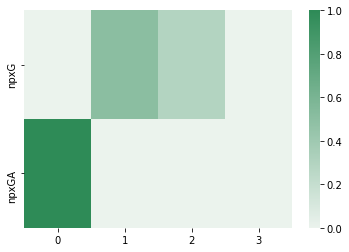

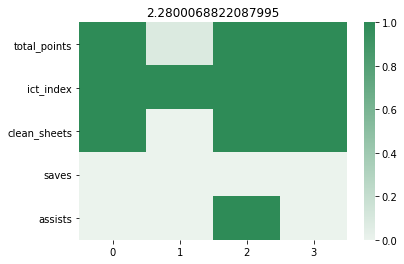

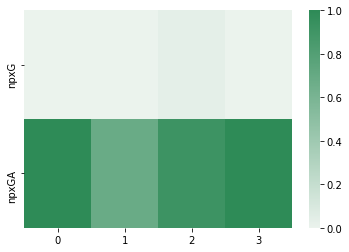

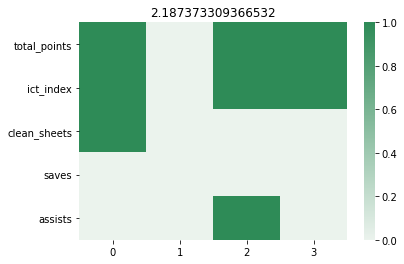

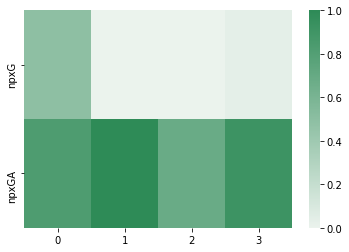

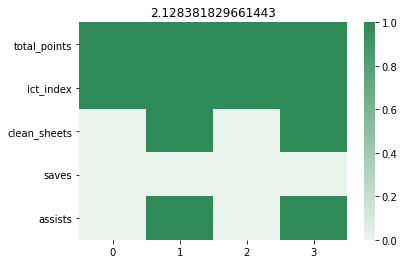

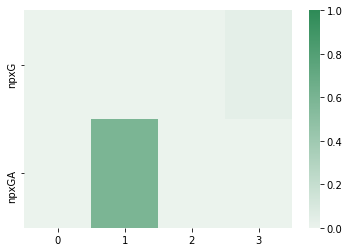

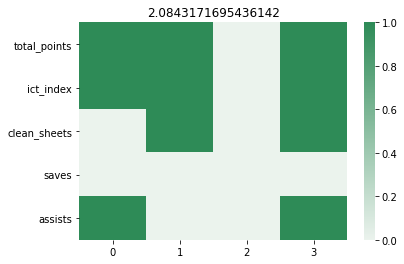

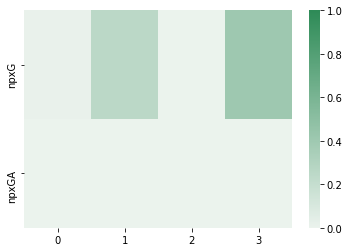

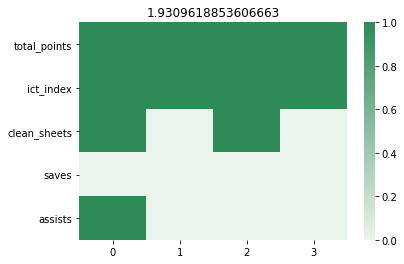

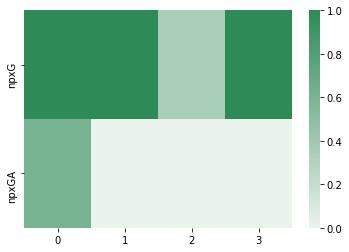

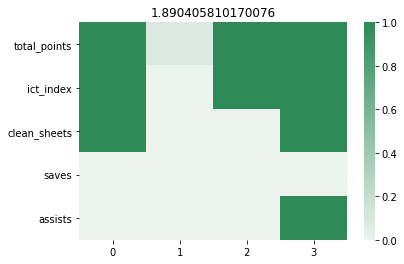

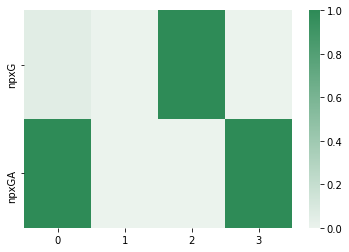

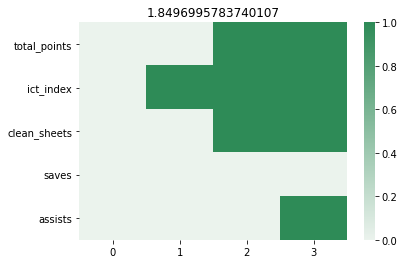

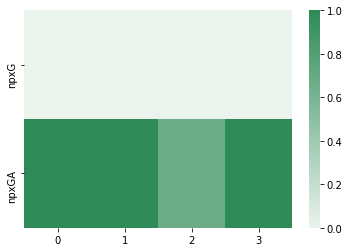

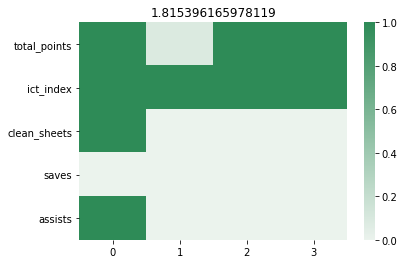

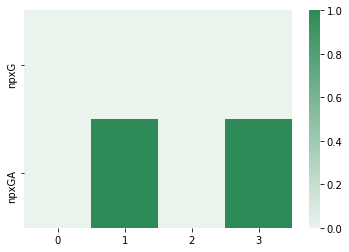

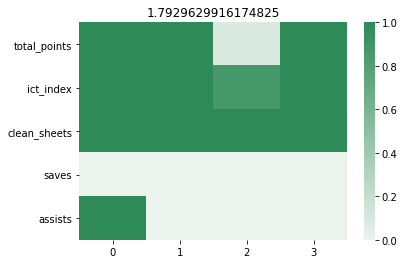

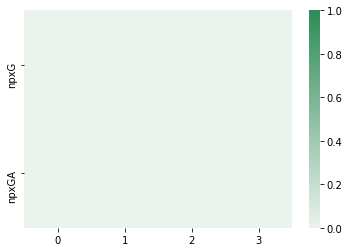

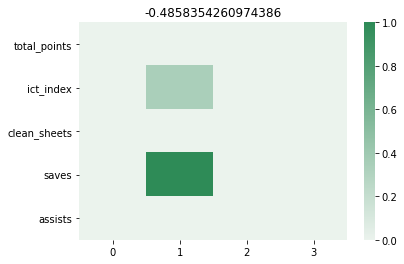

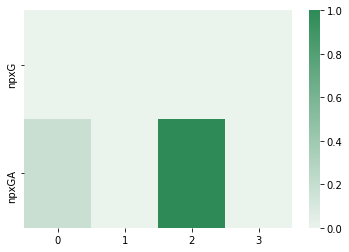

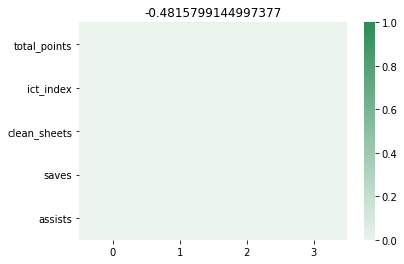

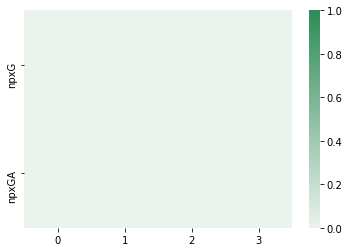

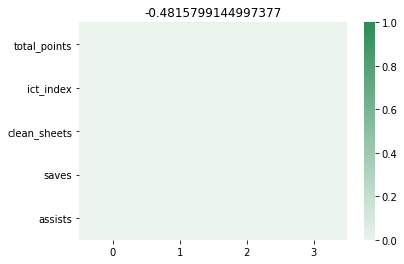

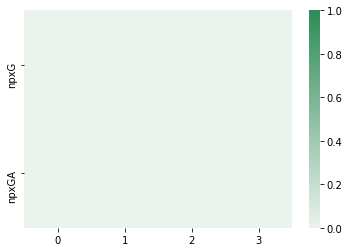

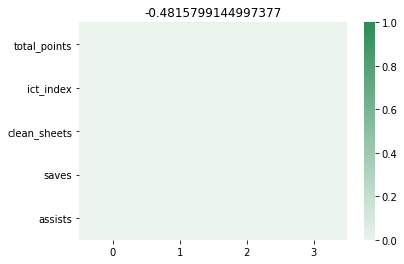

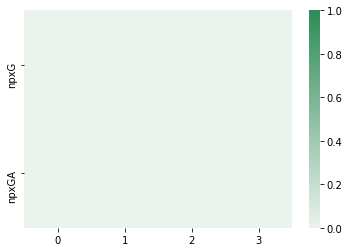

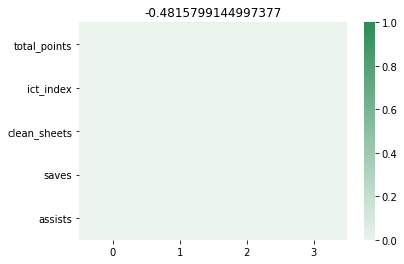

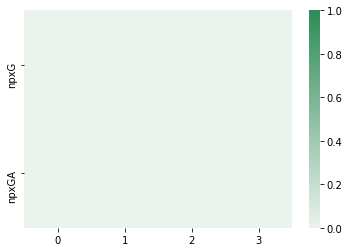

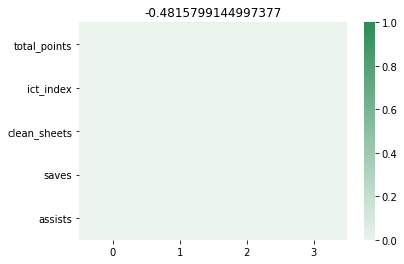

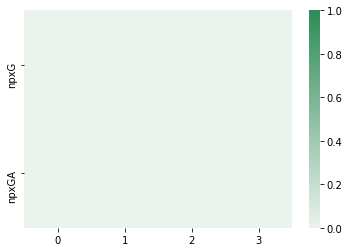

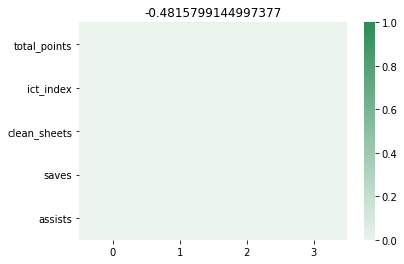

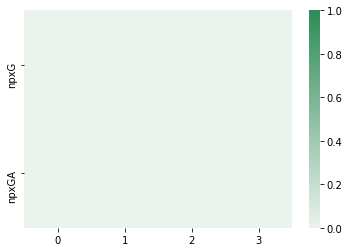

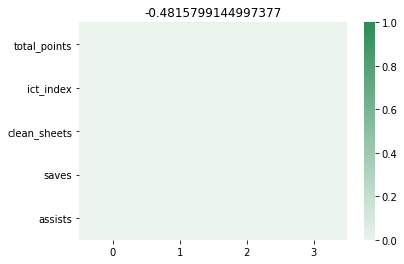

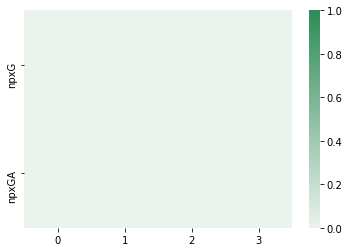

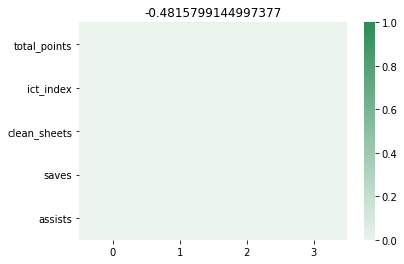

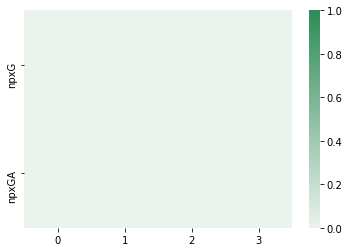

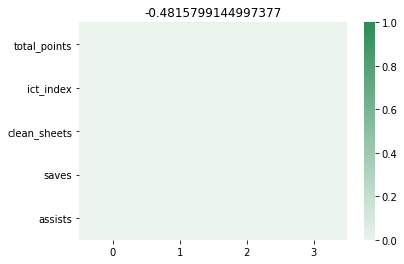

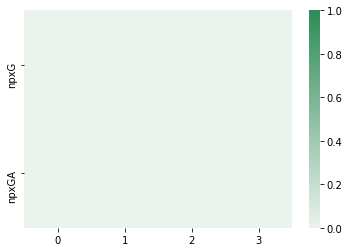

In [8]:
player_opponent_linear_score_model.visualize_predictions(test_loader)

torch.Size([3392, 20])


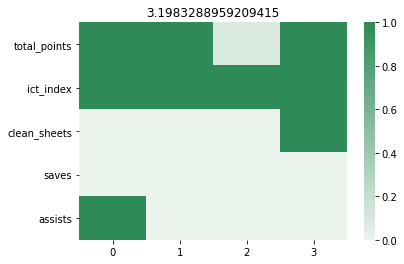

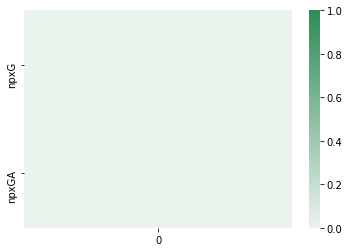

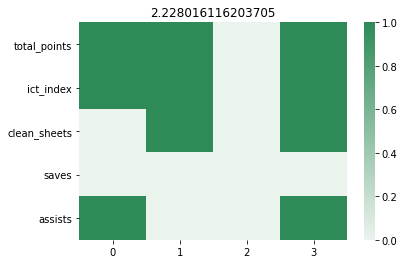

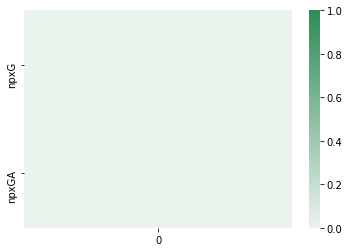

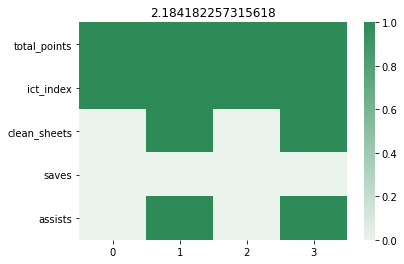

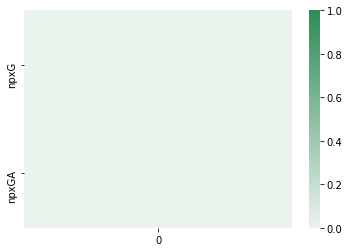

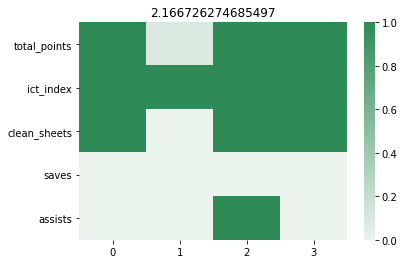

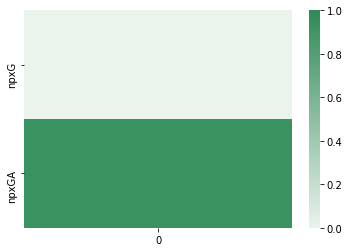

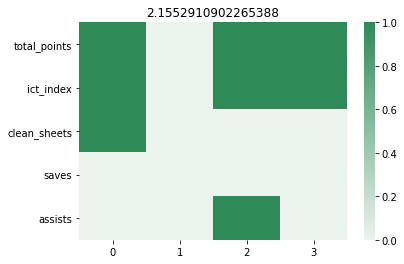

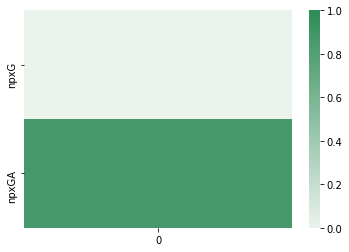

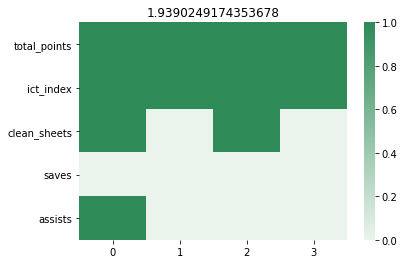

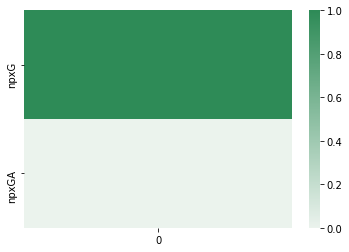

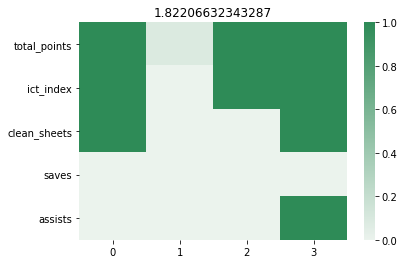

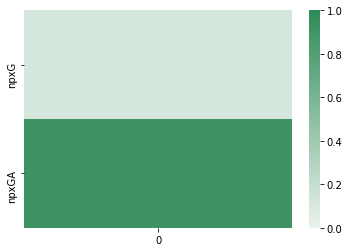

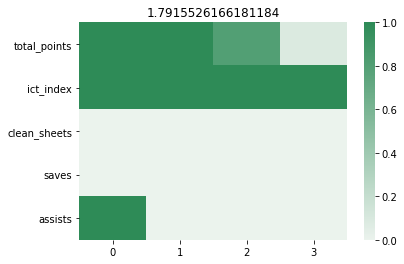

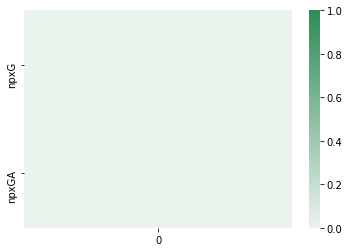

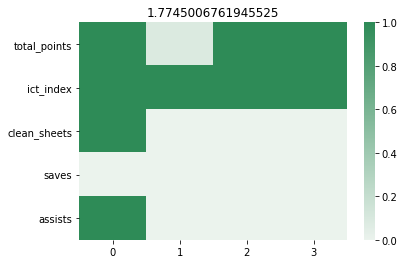

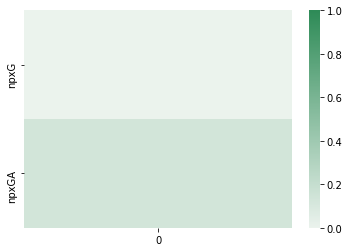

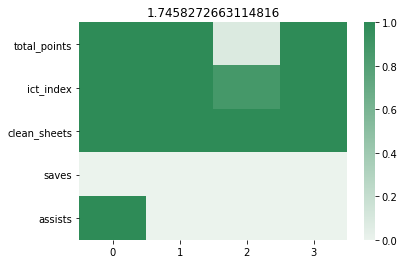

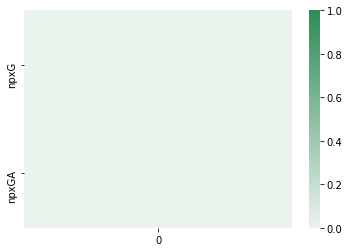

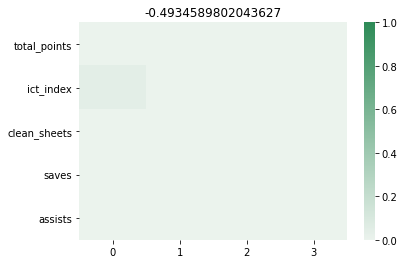

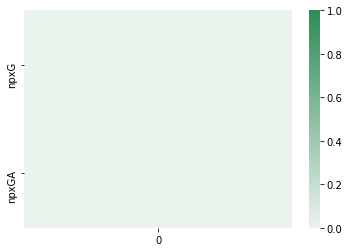

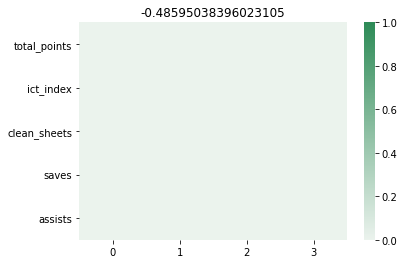

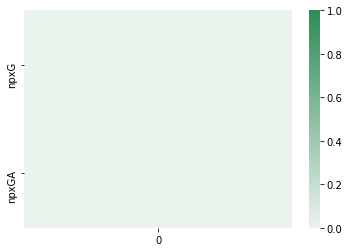

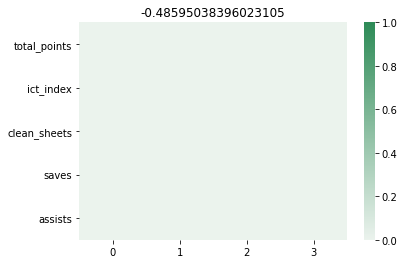

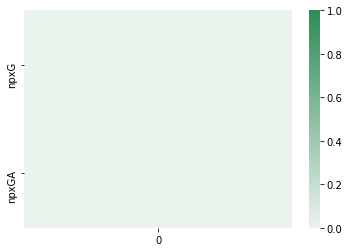

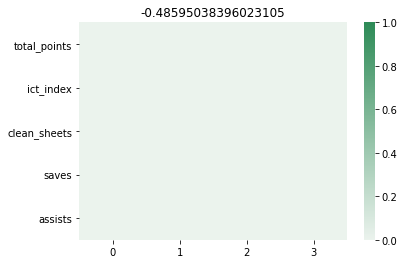

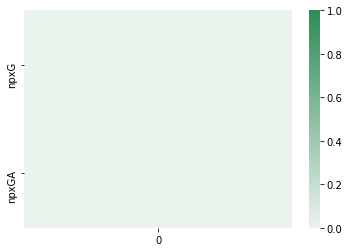

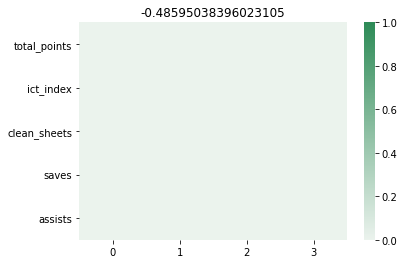

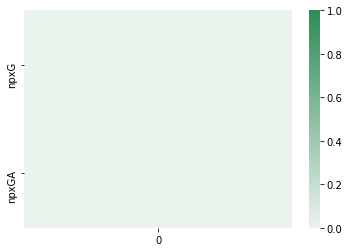

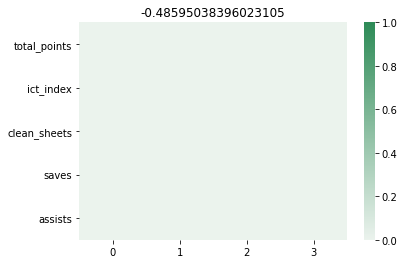

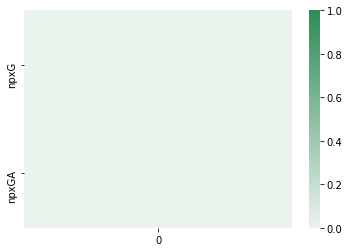

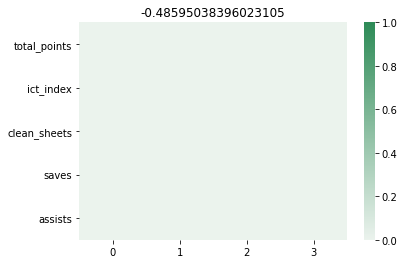

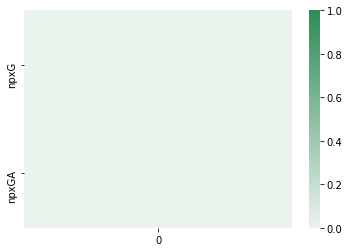

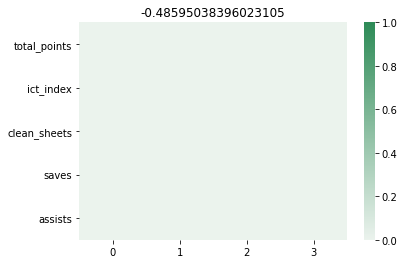

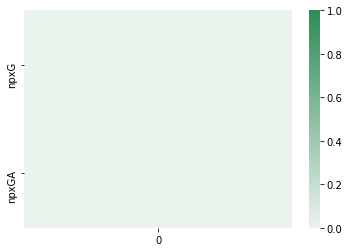

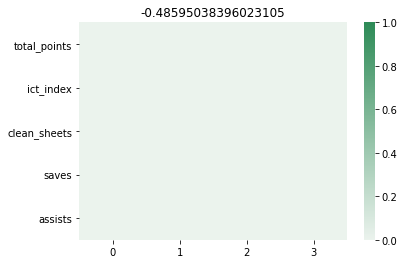

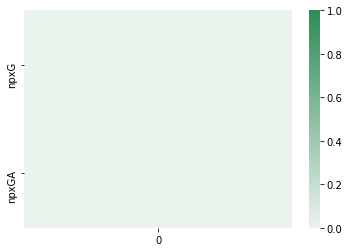

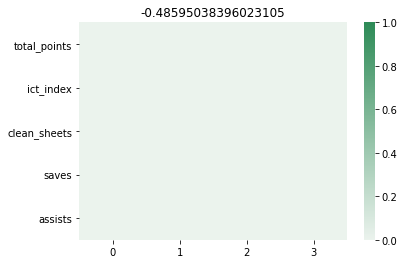

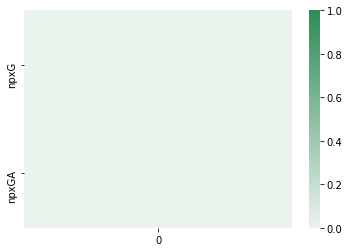

In [9]:
heirarchial_linear_model.visualize_predictions(test_loader)

In [10]:
list(heirarchial_linear_model.model.parameters())

[Parameter containing:
 tensor([[0.3074, 0.0218, 0.0239]], dtype=torch.float64, requires_grad=True),
 Parameter containing:
 tensor([-0.0715], dtype=torch.float64, requires_grad=True)]

torch.Size([3392, 20])


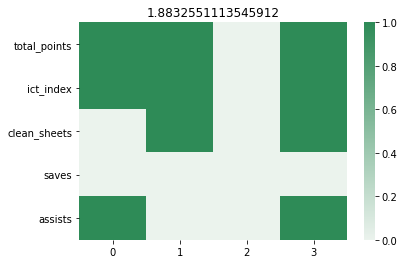

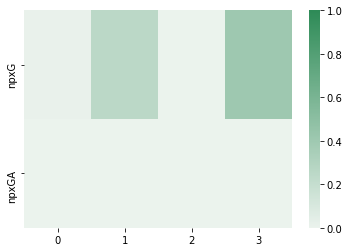

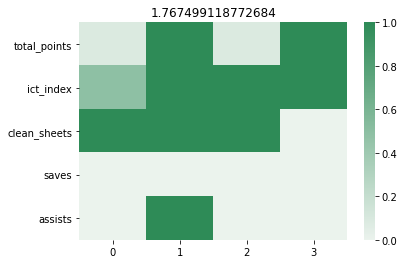

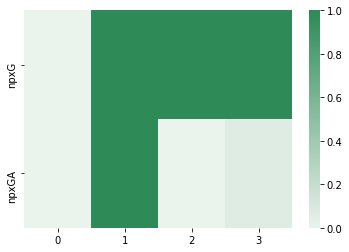

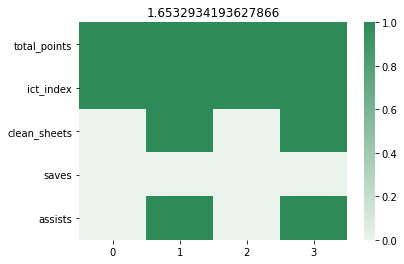

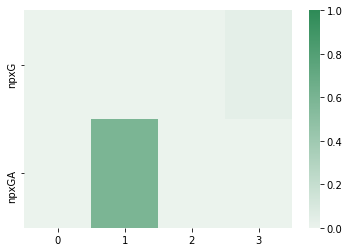

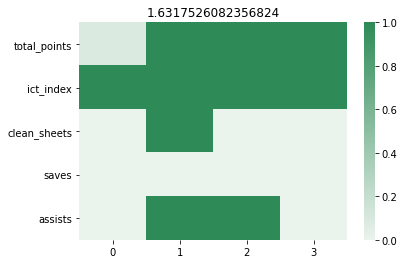

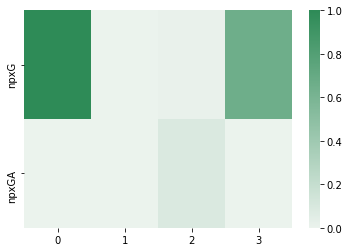

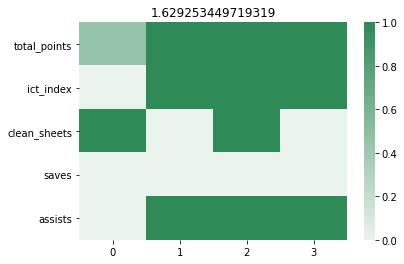

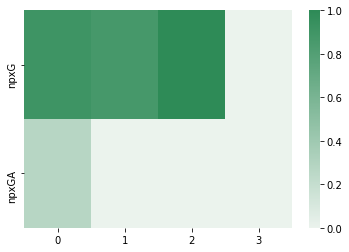

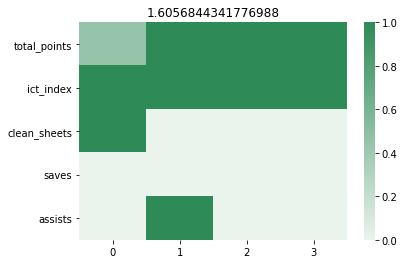

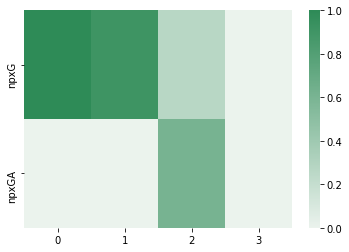

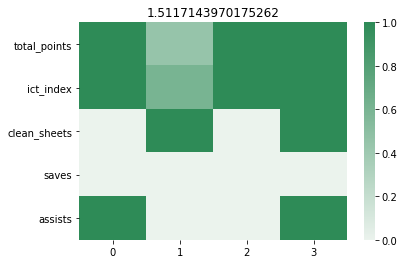

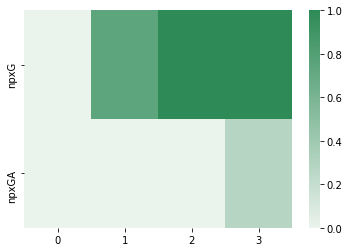

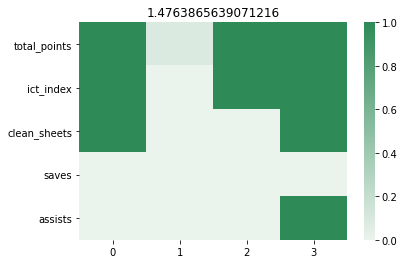

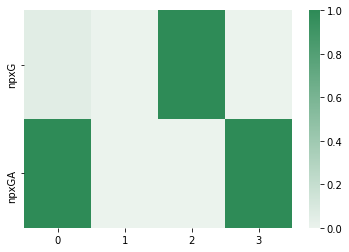

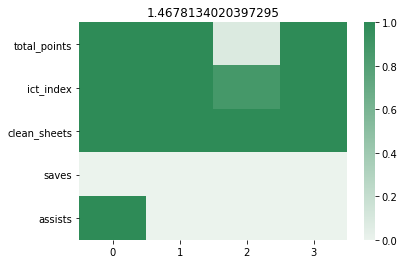

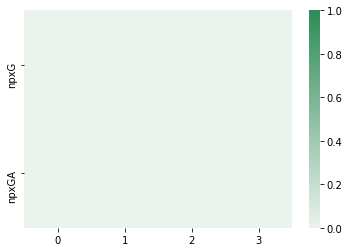

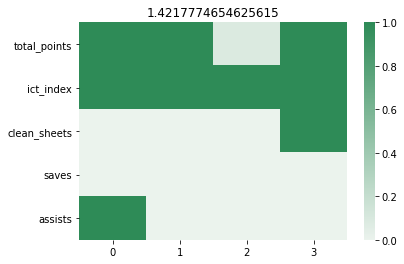

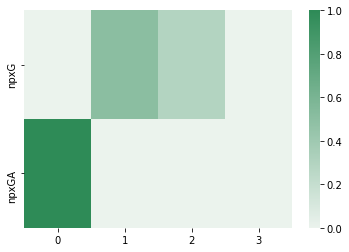

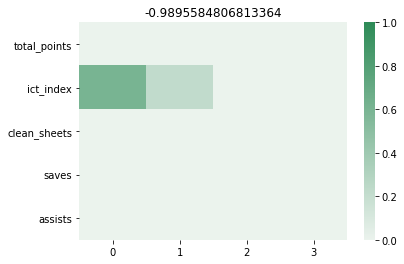

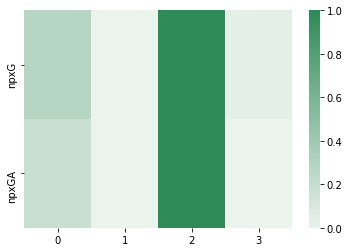

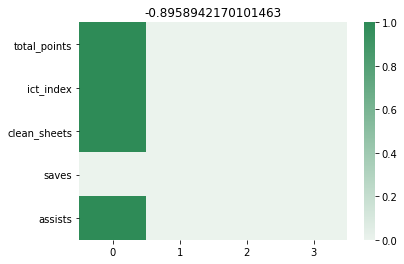

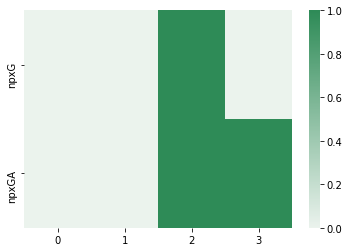

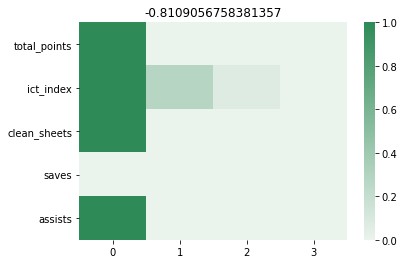

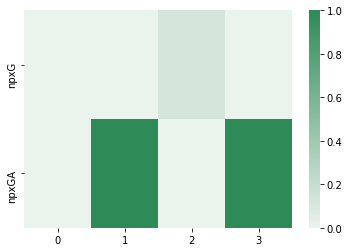

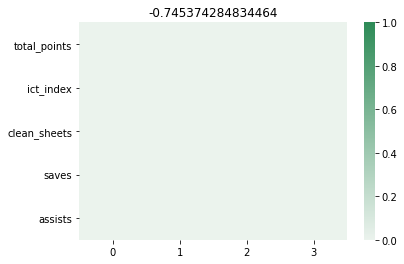

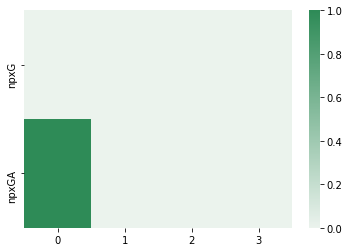

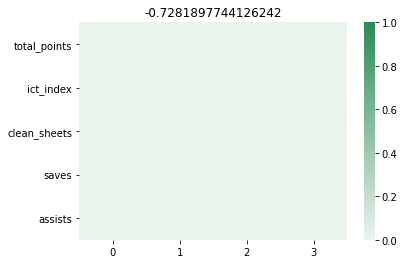

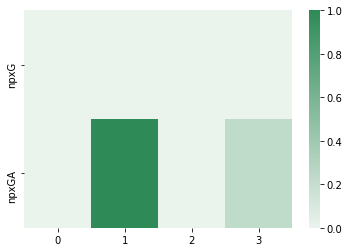

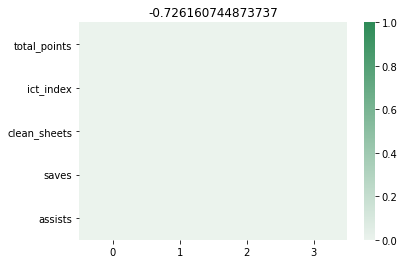

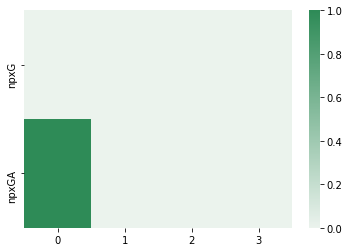

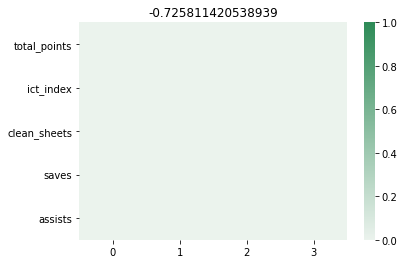

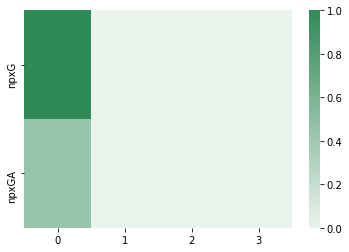

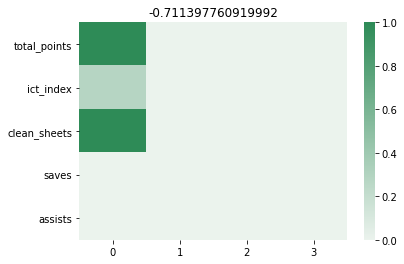

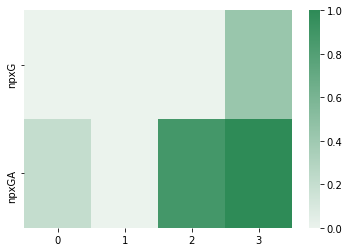

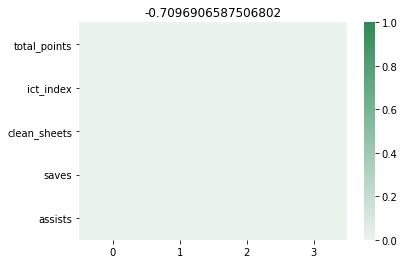

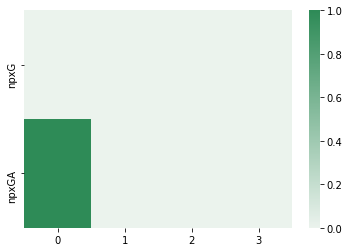

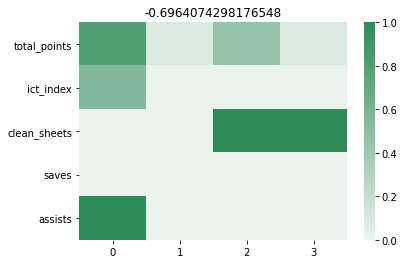

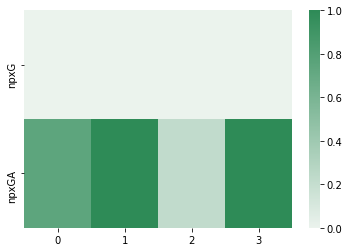

In [11]:
non_linear_model.visualize_predictions(test_loader)